In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
model = ResNet50(weights = 'imagenet')

102973440/102967424 [==============================] - 309s 3us/step


In [5]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Total params: 25,636,712
Trainable params: 25,583,592
Non-trainable params: 53,120
__________________________________________________________________________________________________


In [7]:
img_path = 'tiger.jpg'

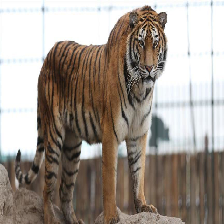

In [8]:
img = image.load_img(img_path, target_size=(224, 224))
img

In [10]:
img_array = image.img_to_array(img)
img_array

array([[[254., 254., 254.],
        [252., 252., 252.],
        [255., 255., 255.],
        ...,
        [254., 255., 255.],
        [251., 255., 255.],
        [248., 253., 255.]],

       [[253., 253., 253.],
        [251., 251., 251.],
        [251., 251., 251.],
        ...,
        [242., 247., 250.],
        [236., 244., 247.],
        [232., 241., 246.]],

       [[252., 252., 252.],
        [250., 250., 250.],
        [253., 253., 253.],
        ...,
        [236., 247., 253.],
        [226., 239., 247.],
        [223., 237., 246.]],

       ...,

       [[152., 134., 120.],
        [145., 127., 113.],
        [133., 115., 101.],
        ...,
        [103.,  93.,  83.],
        [ 80.,  71.,  62.],
        [ 88.,  81.,  71.]],

       [[129., 111.,  97.],
        [132., 114., 100.],
        [136., 118., 104.],
        ...,
        [103.,  93.,  83.],
        [ 82.,  73.,  64.],
        [ 86.,  79.,  69.]],

       [[152., 134., 120.],
        [135., 117., 103.],
        [133., 1

In [12]:
img_tensor = np.expand_dims(img_array , axis=0)
img_tensor

array([[[[254., 254., 254.],
         [252., 252., 252.],
         [255., 255., 255.],
         ...,
         [254., 255., 255.],
         [251., 255., 255.],
         [248., 253., 255.]],

        [[253., 253., 253.],
         [251., 251., 251.],
         [251., 251., 251.],
         ...,
         [242., 247., 250.],
         [236., 244., 247.],
         [232., 241., 246.]],

        [[252., 252., 252.],
         [250., 250., 250.],
         [253., 253., 253.],
         ...,
         [236., 247., 253.],
         [226., 239., 247.],
         [223., 237., 246.]],

        ...,

        [[152., 134., 120.],
         [145., 127., 113.],
         [133., 115., 101.],
         ...,
         [103.,  93.,  83.],
         [ 80.,  71.,  62.],
         [ 88.,  81.,  71.]],

        [[129., 111.,  97.],
         [132., 114., 100.],
         [136., 118., 104.],
         ...,
         [103.,  93.,  83.],
         [ 82.,  73.,  64.],
         [ 86.,  79.,  69.]],

        [[152., 134., 120.],
       

In [14]:
x = preprocess_input(img_tensor)
x

array([[[[ 1.5006100e+02,  1.3722101e+02,  1.3032001e+02],
         [ 1.4806100e+02,  1.3522101e+02,  1.2832001e+02],
         [ 1.5106100e+02,  1.3822101e+02,  1.3132001e+02],
         ...,
         [ 1.5106100e+02,  1.3822101e+02,  1.3032001e+02],
         [ 1.5106100e+02,  1.3822101e+02,  1.2732000e+02],
         [ 1.5106100e+02,  1.3622101e+02,  1.2432000e+02]],

        [[ 1.4906100e+02,  1.3622101e+02,  1.2932001e+02],
         [ 1.4706100e+02,  1.3422101e+02,  1.2732000e+02],
         [ 1.4706100e+02,  1.3422101e+02,  1.2732000e+02],
         ...,
         [ 1.4606100e+02,  1.3022101e+02,  1.1832000e+02],
         [ 1.4306100e+02,  1.2722100e+02,  1.1232000e+02],
         [ 1.4206100e+02,  1.2422100e+02,  1.0832000e+02]],

        [[ 1.4806100e+02,  1.3522101e+02,  1.2832001e+02],
         [ 1.4606100e+02,  1.3322101e+02,  1.2632000e+02],
         [ 1.4906100e+02,  1.3622101e+02,  1.2932001e+02],
         ...,
         [ 1.4906100e+02,  1.3022101e+02,  1.1232000e+02],
         [

In [15]:
preds = model.predict(x)

In [16]:
preds.shape

(1, 1000)

In [17]:
from tensorflow.keras.applications.resnet50 import decode_predictions as dpred

dpred(preds , top = 3)[0]

40960/35363 [==================================] - 0s 2us/step


[('n02129604', 'tiger', 0.8862064),
 ('n02123159', 'tiger_cat', 0.09601683),
 ('n02127052', 'lynx', 0.0119353235)]

In [18]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [19]:
model = VGG16(weights='imagenet' , include_top = False)

img_path = 'tiger.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

58892288/58889256 [==============================] - 298s 5us/step


In [20]:
print(features)

[[[[  0.           0.           0.         ...   0.
      0.           0.        ]
   [  0.           0.           0.         ...   0.
      0.           0.        ]
   [  0.           0.           0.         ...   0.
      0.           0.        ]
   ...
   [  0.           4.834068     0.         ...   0.
      0.           0.        ]
   [  0.           0.           0.         ...   0.
      0.           0.        ]
   [  0.           0.           0.         ...   0.
      0.           0.        ]]

  [[  0.           0.           0.         ...   0.
      0.           0.        ]
   [  0.           0.           0.         ...   0.
      0.           0.        ]
   [  0.           0.           0.         ...   0.
      0.           0.        ]
   ...
   [ 89.813576     0.           0.         ...   0.
      0.           0.        ]
   [ 31.578161     0.           0.         ...   0.
      0.           0.        ]
   [  0.           0.           0.         ...   0.
      0.           